In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, precision_recall_curve, auc

In [2]:
dataframe = pd.read_csv('californiabin.csv', header=None)
dataframe

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,1.0
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
...,...,...,...,...,...,...,...,...,...
1995,0.9220,15.0,6.287671,1.301370,160.0,2.191781,33.36,-115.91,0.0
1996,3.4464,33.0,4.968085,1.060284,915.0,3.244681,37.45,-121.06,0.0
1997,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29,1.0
1998,7.9761,52.0,7.709756,1.151220,842.0,2.053659,37.80,-122.44,1.0


In [3]:
X, y = dataframe.iloc[:, :-1].values, dataframe.iloc[:, -1].values

In [4]:
param_grid_svm = {
    'C': [2**i for i in range(-5, 16, 2)],
    'gamma': [2**i for i in range(-15, 4, 2)]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm = SVC(kernel='rbf', probability=True)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=10, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
# Melhor modelo SVM
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
# Métricas SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

In [5]:
def plot_roc_pr_curves(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower right")

    plt.show()

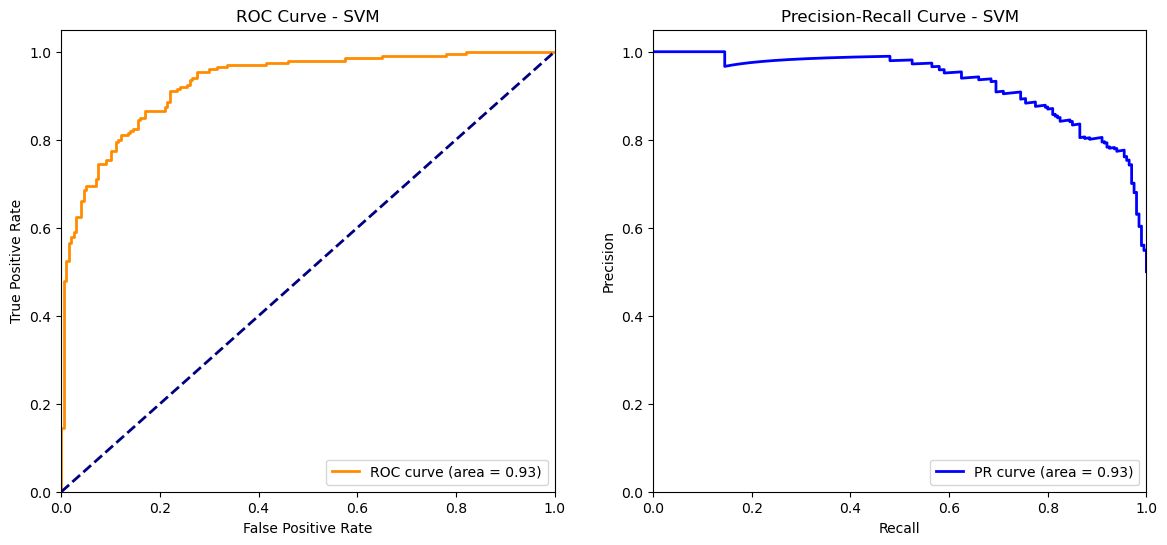

SVM Metrics:
Accuracy: 0.8425, Recall: 0.8500, Precision: 0.8374, F1-Score: 0.8437
Best SVM Hyperparameters: {'C': 128, 'gamma': 0.0078125}


In [6]:
y_pred_svm_proba = best_svm.decision_function(X_test)
plot_roc_pr_curves(y_test, y_pred_svm_proba, "SVM")

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}, Recall: {svm_recall:.4f}, Precision: {svm_precision:.4f}, F1-Score: {svm_f1:.4f}")
print("Best SVM Hyperparameters:", grid_search_svm.best_params_)

In [7]:
param_grid_rf = {
    'n_estimators': [i for i in range(10, 201, 10)],
    'max_depth': [4, 6, 8, 10, None]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

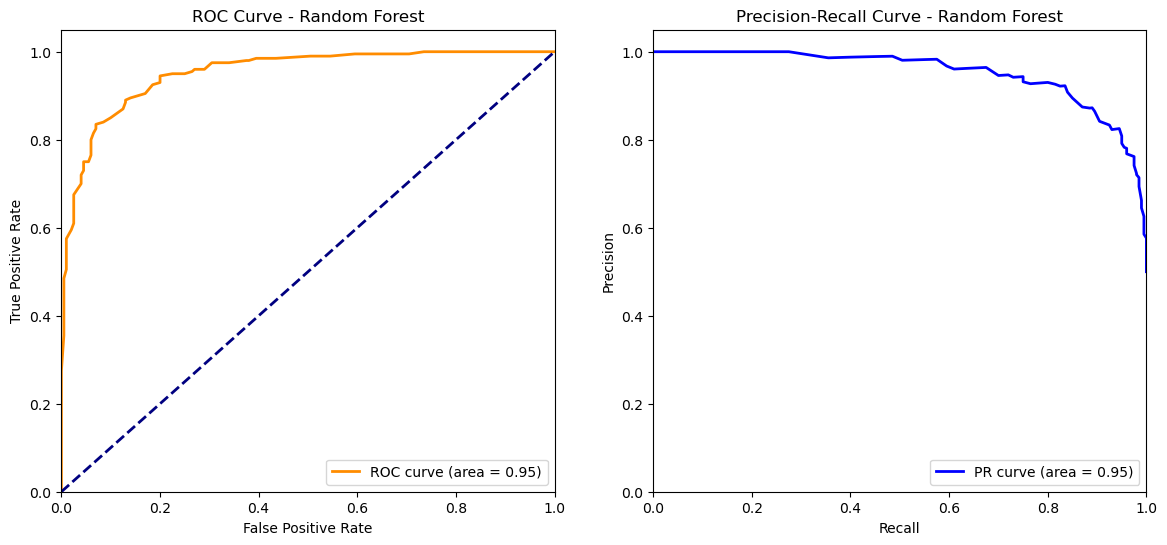


Random Forest Metrics:
Accuracy: 0.8750, Recall: 0.8500, Precision: 0.8947, F1-Score: 0.8718
Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 60}


In [8]:
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]
plot_roc_pr_curves(y_test, y_pred_rf_proba, "Random Forest")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Recall: {rf_recall:.4f}, Precision: {rf_precision:.4f}, F1-Score: {rf_f1:.4f}")
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)